# Project-1 Submission

## Nikta Shrestha

1. Can you automate a system that can generate/compute the total number of blue cells in the provided
image?
Also, how about filtering them by using radius from the center of cell. For instance, let us compute the
total number of cells, where the radius is more than 50.

In [ ]:
# Importing useful packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Mounting notebook to google drive to read data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/

/content/drive/My Drive


# 1. Read the image
First, we will read the input image. As the image read by opencv is in BGR format, we will need to convert it to HSV format.

In [ ]:
image = cv2.imread("data/RBC-stained.png")

original1 = image.copy()
original2 = image.copy()

# Convert BGR to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

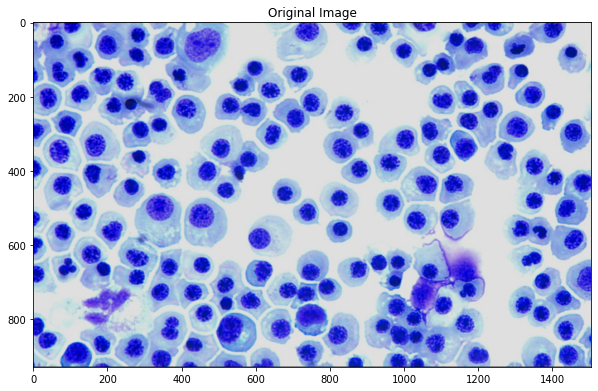

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 2. Masking with HSV lower and upper for blue pixels
Since the actual cell is in dark blue color and the background is in light blue, use of color thresholding technique could be much benificial. This is why we convert our BGR image to HSV format, and then use a lower and upper color threshold to isolate dark blue cells. This will give us the binary mask which can be used for cell counting.

In [ ]:
hsv_lower = np.array([110,170,0])
hsv_upper = np.array([150,255,255])
mask = cv2.inRange(hsv, hsv_lower, hsv_upper)

# 3. Morphological Operations
We will then perform morphological operations:
- Opening - Opening removes thin protrusions of the obtained image
- Closing - Closign removes small holes obtained in the image

This operation will help to smooth the image and remove small bits of noise.

In [ ]:
# Define structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

# Perform opening
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

# Perform closing
close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

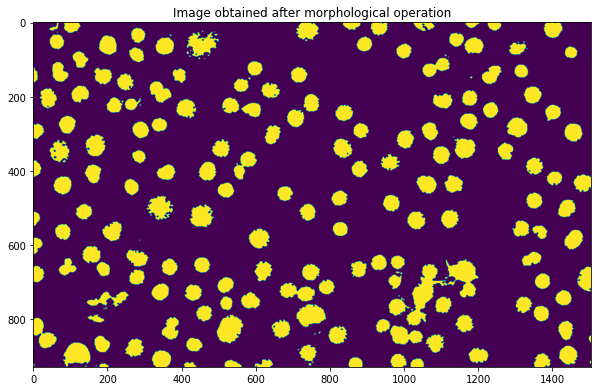

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Image obtained after morphological operation")
plt.imshow(close)

# 4. Find Countours
Now, we will find external contours from the mask obtained in the above process.

In [ ]:
cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# 5. Counting blue cells with radius > 50

In [ ]:
MIN_RADIUS = 50 # Minimum radius you wish to count
minimum_area = 490 # Minimum area to consider a true contour

cell_count = 0 # Count of total number of cell
cells_gt = 0 # Count cells whose radius > MIN_RADIUS
for c in cnts:
    area = cv2.contourArea(c)
    if area > minimum_area:
      (x, y), radius = cv2.minEnclosingCircle(c)
      cell_count += 1
      # Draw contours around all detected cells
      cv2.drawContours(original1, [c], -1, (0,0,255), 2)
      
      if radius > MIN_RADIUS:
        cells_gt += 1

        # Draw circles for those cells whose radius > MIN_RADIUS
        cv2.circle(original2, (int(x), int(y)), int(radius), (0, 255, 0), 8)
        
print('The total number of cells are: {0}'.format(cell_count))
print('Cells with radius greater than {0}: {1}'.format(MIN_RADIUS, cells_gt))

The total number of cells are: 158
Cells with radius greater than 50: 2


# 6. Visualize original image vs contours

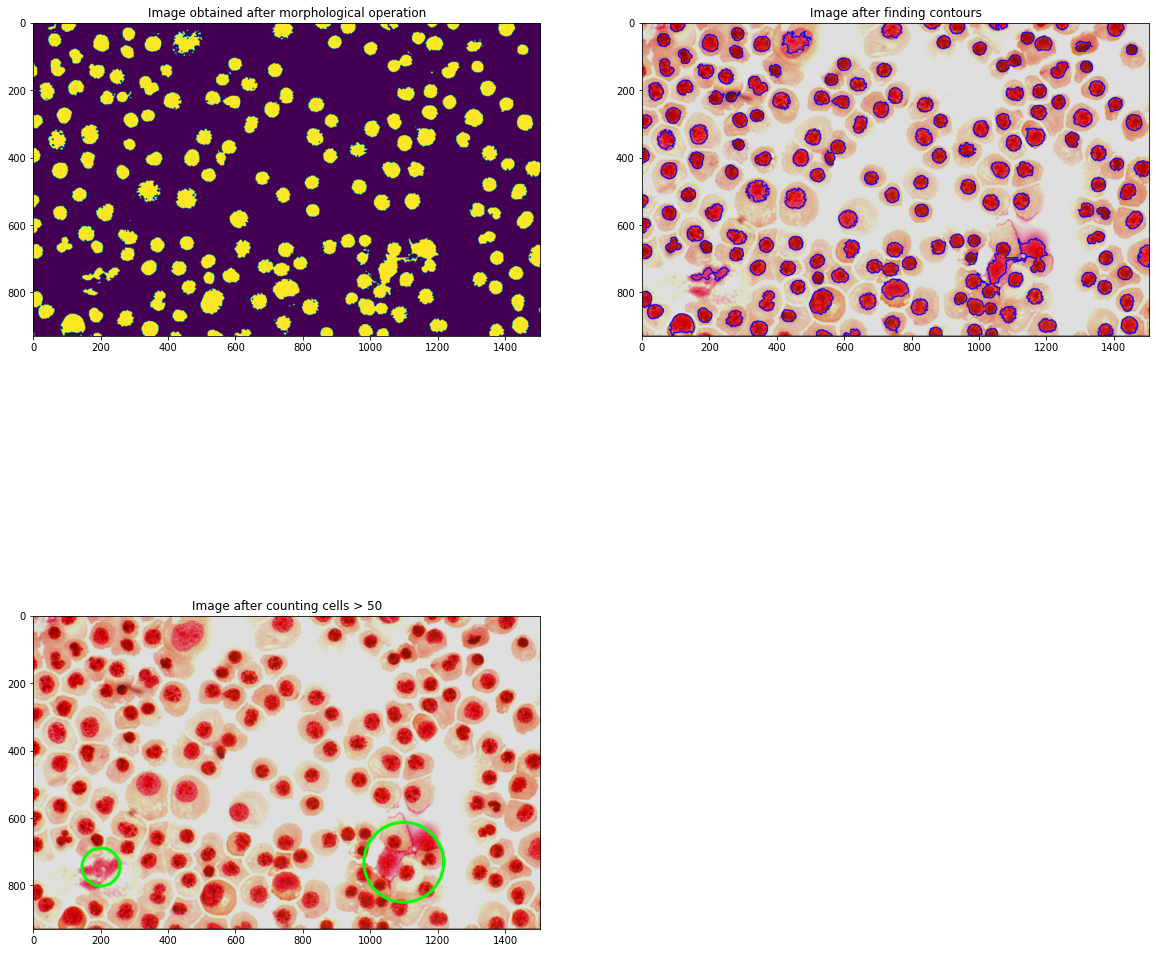

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.subplot(2, 2, 1)
plt.title("Image obtained after morphological operation")
plt.imshow(close)
plt.subplot(2, 2, 2)
plt.title("Image after finding contours")
plt.imshow(original1)
plt.subplot(2, 2, 3)
plt.title("Image after counting cells > 50")
plt.imshow(original2)